In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from scipy import stats
import scipy
from statsmodels.sandbox.stats.multicomp import multipletests

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
data = pd.read_csv('churn_analysis.csv')

In [6]:
data

,Unnamed: 0,state,account_length,area_code,intl_plan,vmail_plan,vmail_message,day_mins,day_calls,day_charge,...,night_mins,night_calls,night_charge,intl_mins,intl_calls,intl_charge,custserv_calls,treatment,mes_estim,churn
0,0,KS,128,415,no,yes,25,265.1,110,45.07,...,244.7,91,11.01,10.0,3,2.70,1,1,0.65,False.
1,1,OH,107,415,no,yes,26,161.6,123,27.47,...,254.4,103,11.45,13.7,3,3.70,1,0,0.55,False.
2,2,NJ,137,415,no,no,0,243.4,114,41.38,...,162.6,104,7.32,12.2,5,3.29,0,0,0.72,False.
3,3,OH,84,408,yes,no,0,299.4,71,50.90,...,196.9,89,8.86,6.6,7,1.78,2,1,0.28,False.
4,4,OK,75,415,yes,no,0,166.7,113,28.34,...,186.9,121,8.41,10.1,3,2.73,3,2,0.45,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,3328,AZ,192,415,no,yes,36,156.2,77,26.55,...,279.1,83,12.56,9.9,6,2.67,2,2,0.59,False.
3329,3329,WV,68,415,no,no,0,231.1,57,39.29,...,191.3,123,8.61,9.6,4,2.59,3,2,0.32,False.
3330,3330,RI,28,510,no,no,0,180.8,109,30.74,...,191.9,91,8.64,14.1,6,3.81,2,1,0.47,False.
3331,3331,CT,184,510,yes,no,0,213.8,105,36.35,...,139.2,137,6.26,5.0,10,1.35,2,2,0.32,False.


In [18]:
data.query('treatment == 1')

,Unnamed: 0,state,account_length,area_code,intl_plan,vmail_plan,vmail_message,day_mins,day_calls,day_charge,...,night_mins,night_calls,night_charge,intl_mins,intl_calls,intl_charge,custserv_calls,treatment,mes_estim,churn
0,0,KS,128,415,no,yes,25,265.1,110,45.07,...,244.7,91,11.01,10.0,3,2.70,1,1,0.65,False.
3,3,OH,84,408,yes,no,0,299.4,71,50.90,...,196.9,89,8.86,6.6,7,1.78,2,1,0.28,False.
8,8,LA,117,408,no,no,0,184.5,97,31.37,...,215.8,90,9.71,8.7,4,2.35,1,1,0.50,False.
12,12,IA,168,408,no,no,0,128.8,96,21.90,...,141.1,128,6.35,11.2,2,3.02,1,1,0.37,False.
17,17,VT,93,510,no,no,0,190.7,114,32.42,...,129.6,121,5.83,8.1,3,2.19,3,1,0.84,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3319,3319,WY,89,415,no,no,0,115.4,99,19.62,...,280.9,112,12.64,15.9,6,4.29,3,1,0.37,False.
3322,3322,MD,62,408,no,no,0,321.1,105,54.59,...,180.5,72,8.12,11.5,2,3.11,4,1,0.63,True.
3323,3323,IN,117,415,no,no,0,118.4,126,20.13,...,227.0,56,10.22,13.6,3,3.67,5,1,0.55,True.
3325,3325,OH,78,408,no,no,0,193.4,99,32.88,...,243.3,109,10.95,9.3,4,2.51,2,1,0.65,False.


In [21]:
pd.crosstab(a, [b, c], rownames=['a'], colnames=['b', 'c'])

b    one        two      
c   dull shiny dull shiny
a                        
bar    1     2    1     0
foo    2     2    1     2

In [24]:
pd.crosstab(a, b, rownames=['a'], colnames=['b'])

b,one,two
a,,
bar,3,1
foo,4,3


In [28]:
pd.crosstab(data.query('treatment == 1 & (state=="KS" | state=="OH")').state, 
            data.query('treatment == 1 & (state=="KS" | state=="OH")').churn)

churn,False.,True.
state,,
KS,18,7
OH,22,2


In [47]:
stats.chi2_contingency(pd.crosstab(data.query('treatment == 1').state, 
            data.query('treatment == 1').churn).iloc[[0, 1]], correction=False)[1]

0.21362073030904896

In [43]:
data.state.nunique()

51

In [59]:
ps = []
tab = pd.crosstab(data.query('treatment == 1').state, 
                    data.query('treatment == 1').churn)
for i in range(data.state.nunique() - 1):
    for j in range(i + 1, data.state.nunique()):
        ps.append(stats.chi2_contingency(tab.iloc[[i, j]], correction=False)[1])

In [51]:
tab

churn,False.,True.
state,,
AK,19,1
AL,25,5
AR,11,5
AZ,17,2
CA,10,5
CO,17,5
CT,25,5
DC,18,1
DE,16,1


In [60]:
sum(np.array(ps) < 0.05)

34

In [63]:
stats.chi2_contingency(tab)

(44.05271236692548,
 0.7097590042778473,
 50,
 array([[16.7183227 ,  3.2816773 ],
        [25.07748405,  4.92251595],
        [13.37465816,  2.62534184],
        [15.88240656,  3.11759344],
        [12.53874202,  2.46125798],
        [18.39015497,  3.60984503],
        [25.07748405,  4.92251595],
        [15.88240656,  3.11759344],
        [14.21057429,  2.78942571],
        [16.7183227 ,  3.2816773 ],
        [17.55423883,  3.44576117],
        [10.86690975,  2.13309025],
        [12.53874202,  2.46125798],
        [15.04649043,  2.95350957],
        [10.03099362,  1.96900638],
        [19.2260711 ,  3.7739289 ],
        [20.89790337,  4.10209663],
        [20.89790337,  4.10209663],
        [12.53874202,  2.46125798],
        [20.06198724,  3.93801276],
        [20.06198724,  3.93801276],
        [23.40565178,  4.59434822],
        [18.39015497,  3.60984503],
        [17.55423883,  3.44576117],
        [17.55423883,  3.44576117],
        [20.06198724,  3.93801276],
        [21.733819

In [ ]:
scipy.stats.fisher_exact

In [65]:
ps = []
tab = pd.crosstab(data.query('treatment == 1').state, 
                    data.query('treatment == 1').churn)
for i in range(data.state.nunique() - 1):
    for j in range(i + 1, data.state.nunique()):
        ps.append(scipy.stats.fisher_exact(tab.iloc[[i, j]])[1])

In [66]:
sum(np.array(ps) < 0.05)

10

In [74]:
data[['mes_estim', 'day_calls']].corr(method="pearson")

,mes_estim,day_calls
mes_estim,1.000000,-0.051794
day_calls,-0.051794,1.000000


In [69]:
stats.ttest_rel(data.day_calls, data.mes_estim)

Ttest_relResult(statistic=287.41764388844297, pvalue=0.0)

In [71]:
stats.stats.pearsonr(data.day_calls, data.mes_estim)

(-0.05179435058757295, 0.002779883686972572)

In [73]:
data[['mes_estim', 'day_calls']].corr(method="spearman")

,mes_estim,day_calls
mes_estim,1.00000,0.04335
day_calls,0.04335,1.00000


In [75]:
stats.stats.spearmanr(data.day_calls, data.mes_estim)

SpearmanrResult(correlation=0.043349880533927444, pvalue=0.012317367189170541)

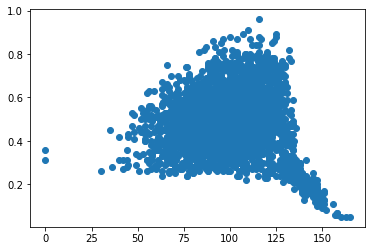

In [76]:
scatter(data.day_calls, data.mes_estim)

((array([-3.5297919 , -3.28786833, -3.15418238, ...,  3.15418238,
          3.28786833,  3.5297919 ]),
  array([0.05, 0.05, 0.05, ..., 0.89, 0.91, 0.96])),
 (0.13861708020693372, 0.4842364236423642, 0.9996050483985329))

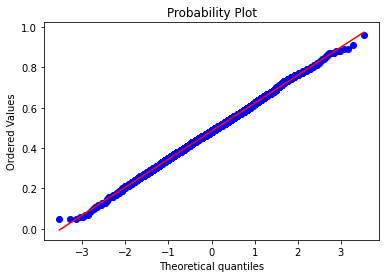

In [80]:
stats.probplot(data.mes_estim, dist="norm", plot=pylab)

In [81]:
stats.chi2_contingency(tab)

(44.05271236692548,
 0.7097590042778473,
 50,
 array([[16.7183227 ,  3.2816773 ],
        [25.07748405,  4.92251595],
        [13.37465816,  2.62534184],
        [15.88240656,  3.11759344],
        [12.53874202,  2.46125798],
        [18.39015497,  3.60984503],
        [25.07748405,  4.92251595],
        [15.88240656,  3.11759344],
        [14.21057429,  2.78942571],
        [16.7183227 ,  3.2816773 ],
        [17.55423883,  3.44576117],
        [10.86690975,  2.13309025],
        [12.53874202,  2.46125798],
        [15.04649043,  2.95350957],
        [10.03099362,  1.96900638],
        [19.2260711 ,  3.7739289 ],
        [20.89790337,  4.10209663],
        [20.89790337,  4.10209663],
        [12.53874202,  2.46125798],
        [20.06198724,  3.93801276],
        [20.06198724,  3.93801276],
        [23.40565178,  4.59434822],
        [18.39015497,  3.60984503],
        [17.55423883,  3.44576117],
        [17.55423883,  3.44576117],
        [20.06198724,  3.93801276],
        [21.733819

In [82]:
def proportions_diff_z_stat_ind(sample1, sample2):
    n1 = len(sample1)
    n2 = len(sample2)
    
    p1 = float(sum(sample1)) / n1
    p2 = float(sum(sample2)) / n2 
    P = float(p1*n1 + p2*n2) / (n1 + n2)
    
    return (p1 - p2) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))

def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - scipy.stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return scipy.stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - scipy.stats.norm.cdf(z_stat)

In [103]:
proportions_diff_z_test(proportions_diff_z_stat_ind(
    data.query('treatment == 2').y, data.query('treatment == 1').y))

0.009348084294451109

In [84]:
data.query('treatment == 1').churn

0       False.
3       False.
8       False.
12      False.
17      False.
         ...  
3319    False.
3322     True.
3323     True.
3325    False.
3330    False.
Name: churn, Length: 1097, dtype: object

In [97]:
data['y'] = list(map(int, data.churn == 'True.'))

In [98]:
data

,Unnamed: 0,state,account_length,area_code,intl_plan,vmail_plan,vmail_message,day_mins,day_calls,day_charge,...,night_calls,night_charge,intl_mins,intl_calls,intl_charge,custserv_calls,treatment,mes_estim,churn,y
0,0,KS,128,415,no,yes,25,265.1,110,45.07,...,91,11.01,10.0,3,2.70,1,1,0.65,False.,0
1,1,OH,107,415,no,yes,26,161.6,123,27.47,...,103,11.45,13.7,3,3.70,1,0,0.55,False.,0
2,2,NJ,137,415,no,no,0,243.4,114,41.38,...,104,7.32,12.2,5,3.29,0,0,0.72,False.,0
3,3,OH,84,408,yes,no,0,299.4,71,50.90,...,89,8.86,6.6,7,1.78,2,1,0.28,False.,0
4,4,OK,75,415,yes,no,0,166.7,113,28.34,...,121,8.41,10.1,3,2.73,3,2,0.45,False.,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,3328,AZ,192,415,no,yes,36,156.2,77,26.55,...,83,12.56,9.9,6,2.67,2,2,0.59,False.,0
3329,3329,WV,68,415,no,no,0,231.1,57,39.29,...,123,8.61,9.6,4,2.59,3,2,0.32,False.,0
3330,3330,RI,28,510,no,no,0,180.8,109,30.74,...,91,8.64,14.1,6,3.81,2,1,0.47,False.,0
3331,3331,CT,184,510,yes,no,0,213.8,105,36.35,...,137,6.26,5.0,10,1.35,2,2,0.32,False.,0
